# Import Libraries and Load Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
# from ml_metrics import rmse

In [2]:
train= pd.read_csv("house_price_dataset.csv")


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis

## Dataset summary statistics

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1259.0,630.000000,363.586303,1.0,315.5,630.0,944.5,1259.0
MSSubClass,1259.0,56.914218,42.353617,20.0,20.0,50.0,70.0,190.0
LotFrontage,1041.0,70.110471,23.522213,21.0,59.0,70.0,80.0,313.0
LotArea,1259.0,10524.300238,10391.598333,1300.0,7590.0,9452.0,11611.0,215245.0
OverallQual,1259.0,6.103257,1.381394,1.0,5.0,6.0,7.0,10.0
OverallCond,1259.0,5.570294,1.119465,1.0,5.0,5.0,6.0,9.0
YearBuilt,1259.0,1971.478157,29.933659,1875.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1259.0,1984.816521,20.617506,1950.0,1966.5,1993.0,2004.0,2010.0
MasVnrArea,1252.0,103.133387,182.185126,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,1259.0,443.334392,439.025793,0.0,0.0,385.0,712.0,2260.0


## Visualize selected features

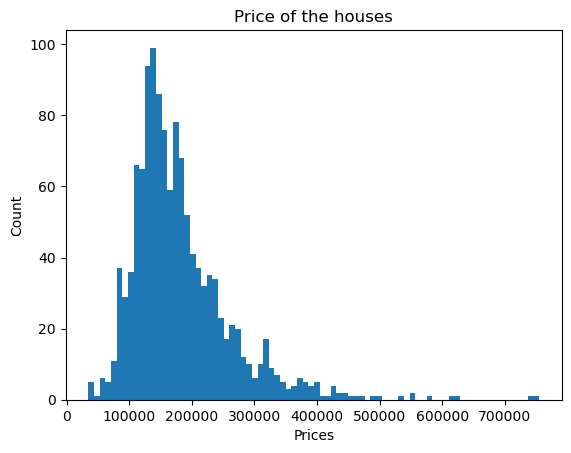

In [5]:
train.dropna(axis=0, subset=['SalePrice'], inplace=True) # droping any row without output 
plt.hist(train['SalePrice'],bins=80);
plt.title("Price of the houses");
plt.xlabel("Prices");
plt.ylabel("Count");

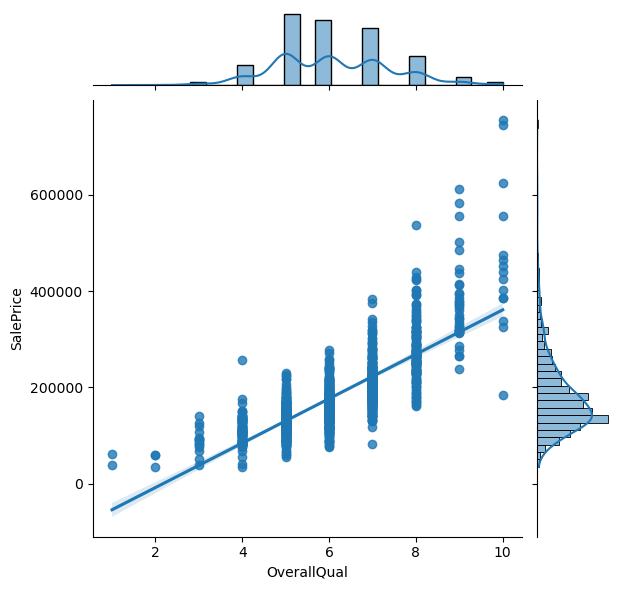

In [6]:
sns.jointplot(x = "OverallQual", y = "SalePrice", data = train, kind = "reg");

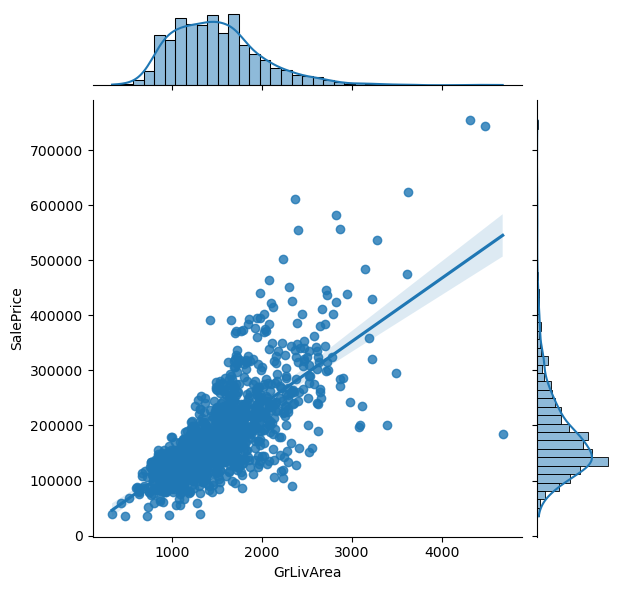

In [7]:
sns.jointplot(x = "GrLivArea", y = "SalePrice", data = train, kind = "reg");

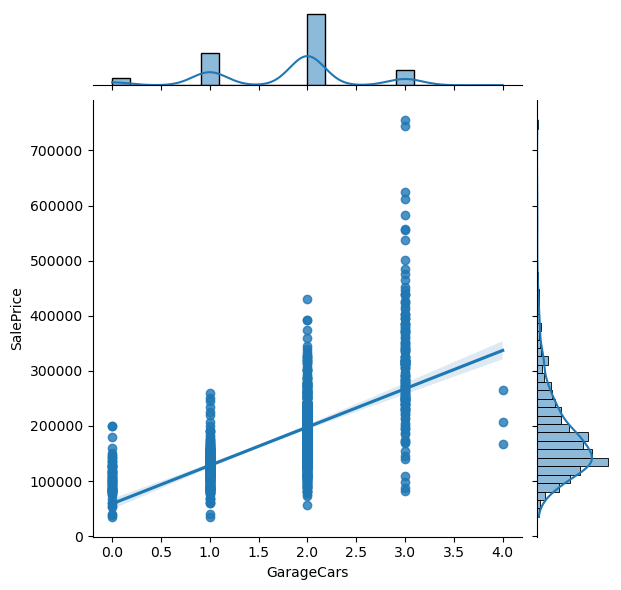

In [8]:
sns.jointplot(x = "GarageCars", y = "SalePrice", data = train, kind = "reg");

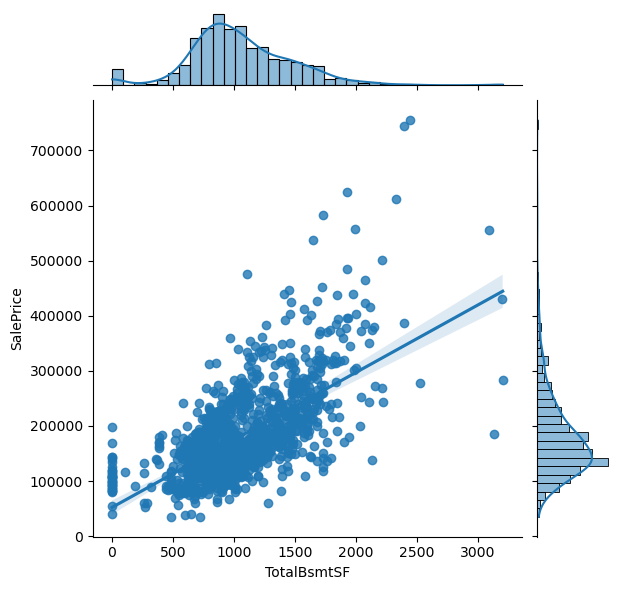

In [11]:
sns.jointplot(x = "TotalBsmtSF", y = "SalePrice", data = train, kind = "reg");

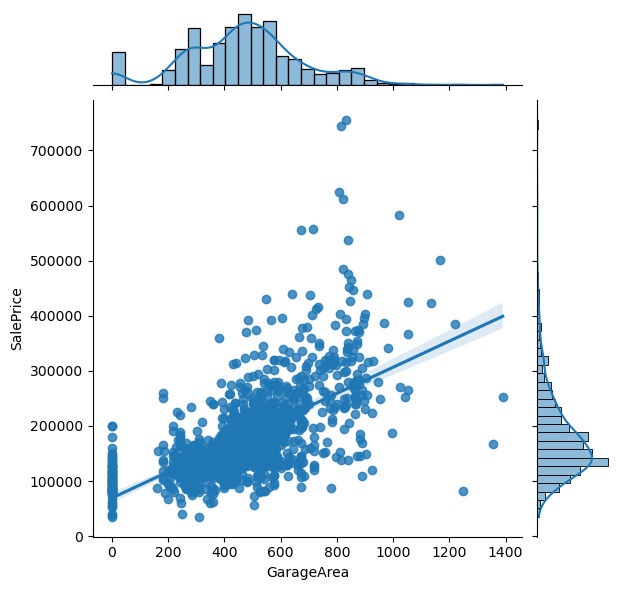

In [9]:
sns.jointplot(x = "GarageArea", y = "SalePrice", data = train, kind = "reg");

## Top most correlated fatures with the target variable

C:\Users\aslas\AppData\Local\Temp\ipykernel_12516\2061742472.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


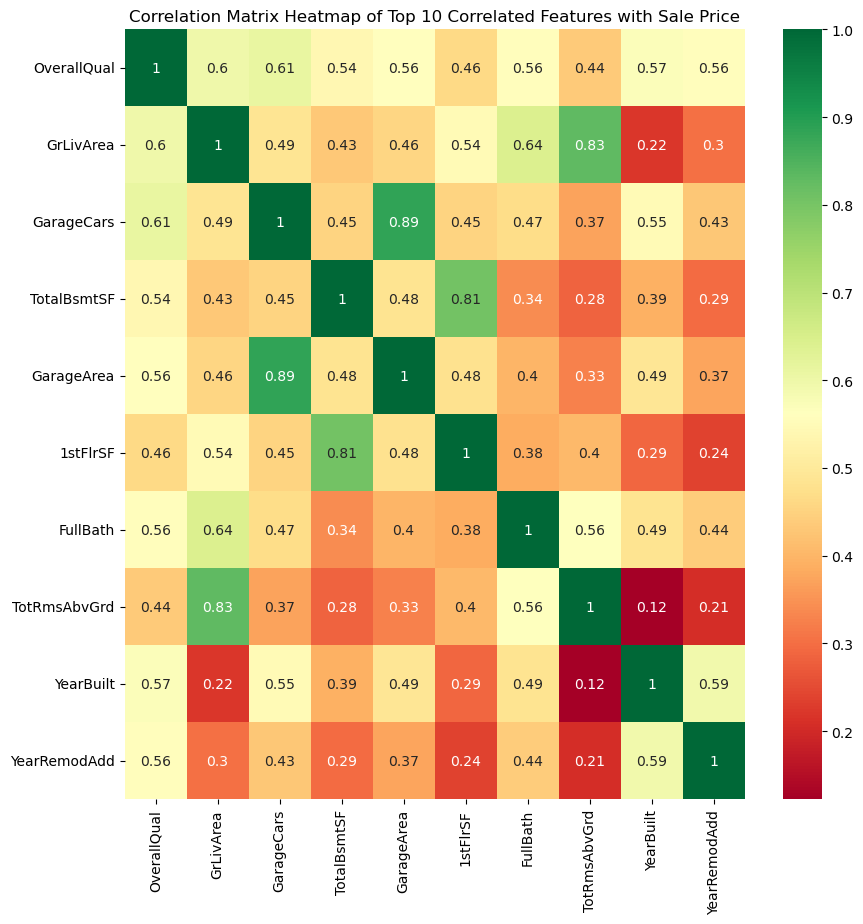

In [10]:
# First, let's compute the correlation matrix
correlation_matrix = train.corr()

# Let's focus on the correlations of other variables with 'SalePrice'
correlation_with_saleprice = correlation_matrix["SalePrice"].sort_values(ascending=False)

# Selecting top 10 features that are most correlated with 'SalePrice'
top_corr_features = correlation_with_saleprice.index[1:11]

# Creating the correlation matrix heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

plt.title('Correlation Matrix Heatmap of Top 10 Correlated Features with Sale Price')
plt.show()


Scatter plot of Top 5 correlated features and the target variable

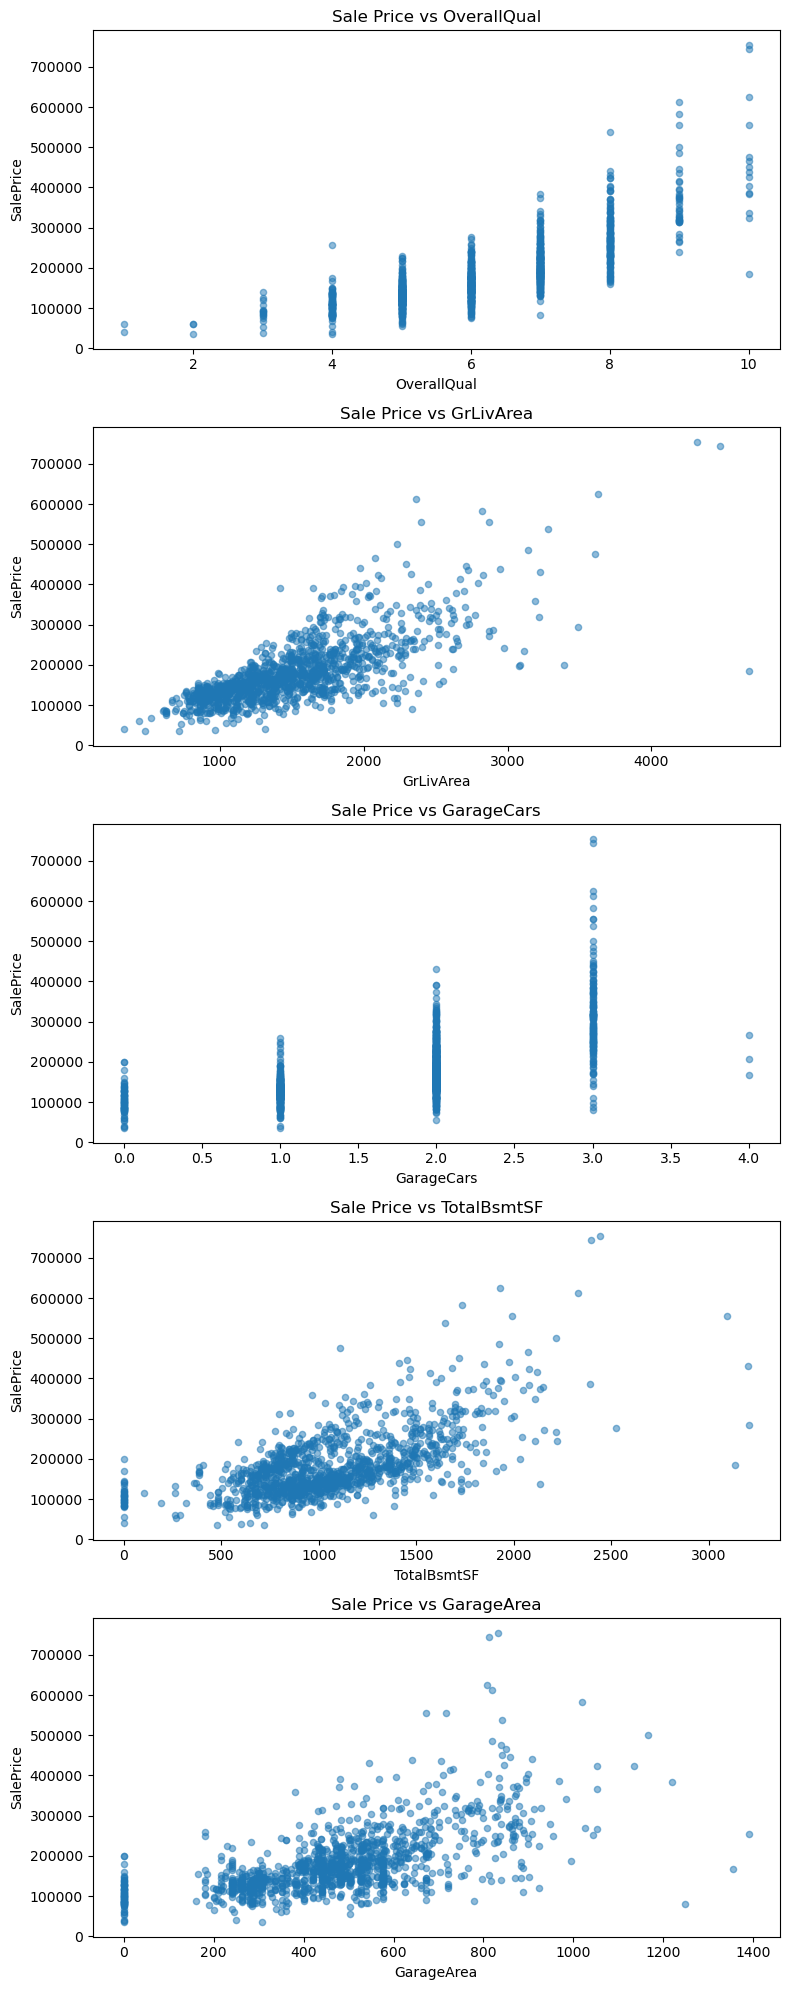

In [11]:
# Creating scatter plots for the top 5 most correlated variables with 'SalePrice'
top_corr_features = correlation_with_saleprice.index[1:6]

fig, axes = plt.subplots(nrows=len(top_corr_features), figsize=(8, 20))

for i, feature in enumerate(top_corr_features):
    train.plot(kind="scatter", x=feature, y="SalePrice", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Sale Price vs {feature}')

plt.tight_layout()
plt.show()


## Visualize Categorical Features and Target Variables

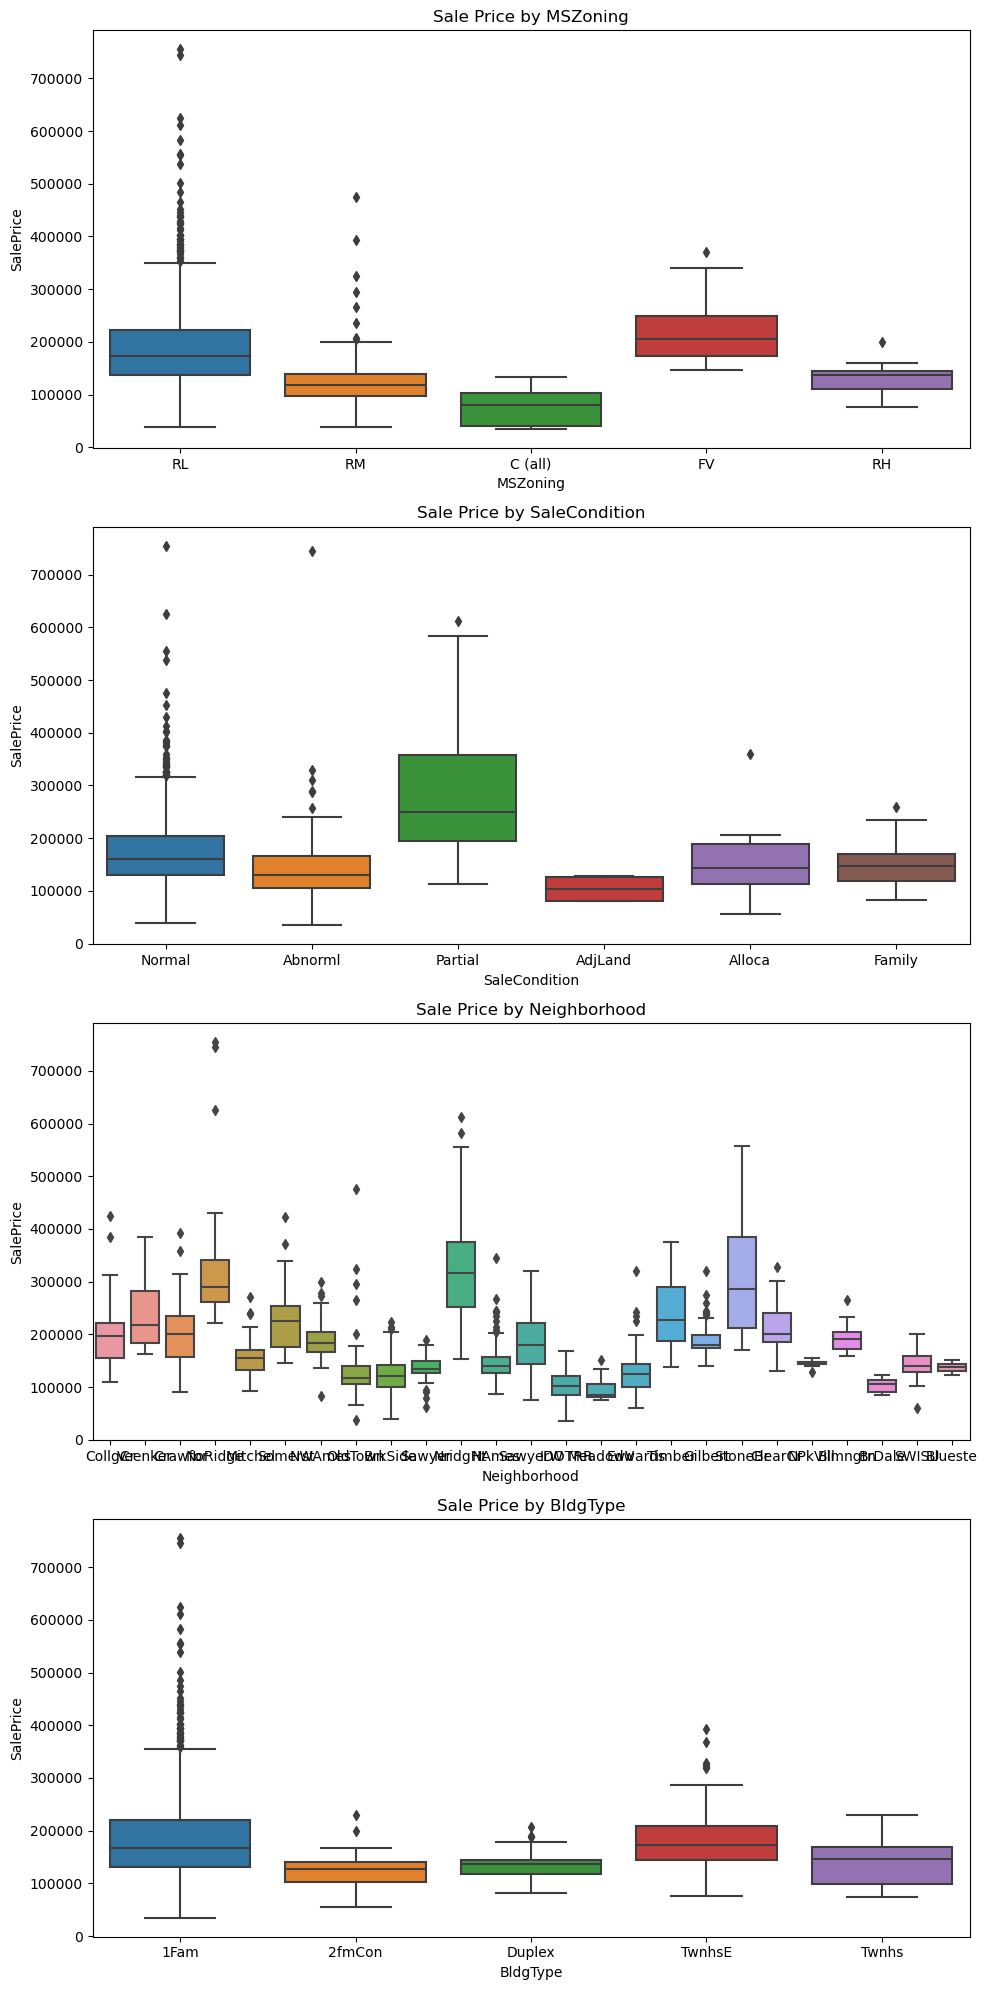

In [12]:


# Selecting a few categorical variables for visualization
categorical_vars = ['MSZoning', 'SaleCondition', 'Neighborhood', 'BldgType']

fig, axes = plt.subplots(nrows=len(categorical_vars), figsize=(10, 20))

for i, var in enumerate(categorical_vars):
    # Creating a boxplot for each categorical variable
    sns.boxplot(x=var, y="SalePrice", data=train, ax=axes[i])
    axes[i].set_title(f'Sale Price by {var}')

plt.tight_layout()
plt.show()


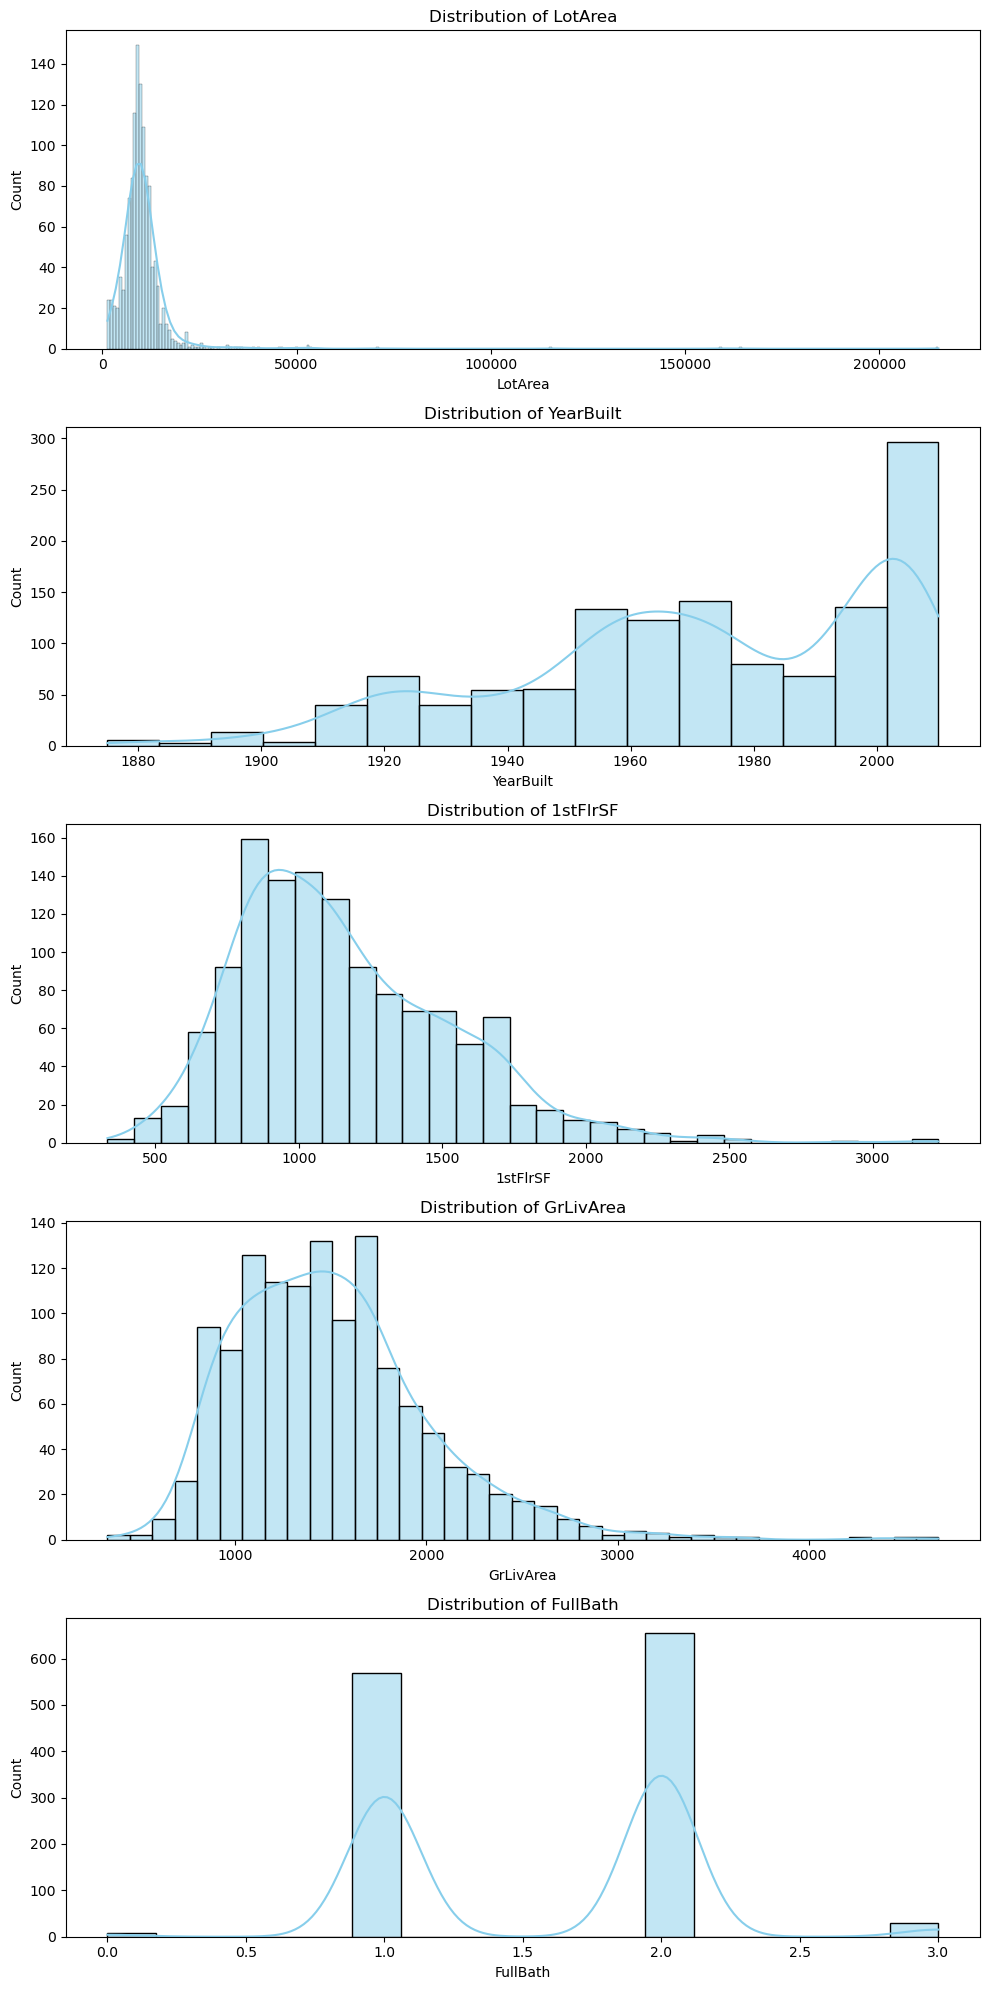

In [13]:
# Selecting a few numerical variables for visualization
numerical_vars = ['LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'FullBath']

fig, axes = plt.subplots(nrows=len(numerical_vars), figsize=(10, 20))

for i, var in enumerate(numerical_vars):
    # Creating a histogram for each numerical variable
    sns.histplot(data=train, x=var, kde=True, color="skyblue", ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


# Dataset Preprocessing

## Dealing with missing values


In [14]:
train.isnull().sum().head(60)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      218
LotArea            0
Street             0
Alley           1183
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          35
BsmtCond          35
BsmtExposure      36
BsmtFinType1      35
BsmtFinSF1         0
BsmtFinType2      36
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Many features contain NaN (missing) values. Let's remove them

Also, Remove duplicates in the dataset

In [17]:
# lotFrontage: Linear feet of street connected to property

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define preprocessing pipelines for both numerical and categorical data.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)


NameError: name 'numerical_cols' is not defined

In [21]:
train.isnull().sum().head(60)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional

In [23]:
# train = pd.DataFrame(train).fillna(pd.DataFrame(train).mean())
train.fillna(train.mean(numeric_only=True), inplace=True)



## Visualize Categorical Features

Label encoding encodes categorical variables so that they can be used by machine learning models. 
First, such categorical variables in our dataset are listed below:

In [24]:
# Get the categorical columns in the dataset
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

# print cat_cols values before label encoding 
print(cat_cols)

# Assuming your dataframe is named 'df'
cat_cols = train.select_dtypes(include=['object']).columns
unique_vals = dict([])
for col in cat_cols:
    unique_vals[col] = train[col].nunique()
    print(f"{col}: {unique_vals[col]}")

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
MSZoning: 5
Street: 2
Alley: 3
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 6
Exterior1st: 14
Exterior2nd: 15
MasVnrType: 4
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinType2: 7
Heating: 5
HeatingQC: 5
CentralAir: 2
Electrical: 5
KitchenQual: 4
Fu

Visualize all the categories count in a bar chart

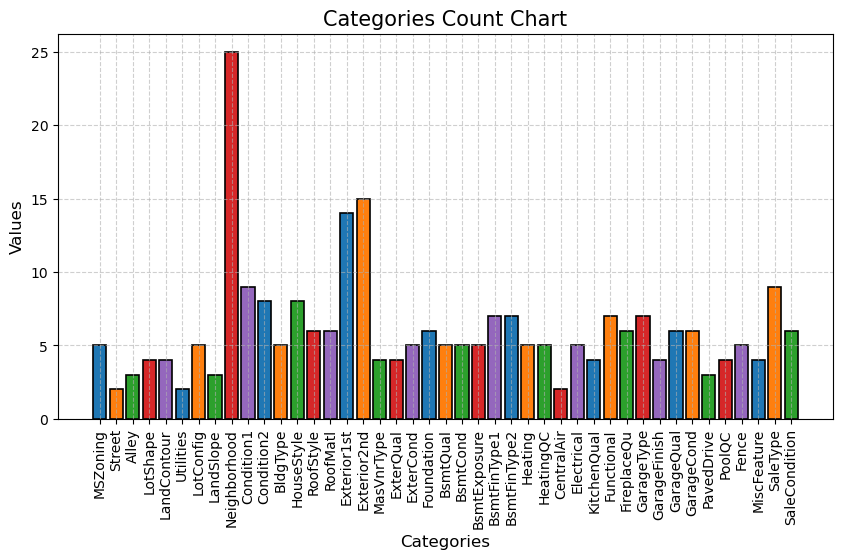

In [25]:
x = list(unique_vals.keys())
y = list(unique_vals.values())

# Create color list
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# # Create a bar chart|(figsize=(10, 5))
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data with colors
ax.bar(x, y, color=colors, edgecolor='black', linewidth=1.2)

# Set grid and its properties
ax.grid(True, linestyle='--', alpha=0.6)

# Set the title and labels
plt.title('Categories Count Chart', fontsize=15)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=90)
# Display the plot
plt.show()

## Feature scaling
First, find only numerical columns. Feature scaling will be applied to these columns only. 


In [26]:
# remove the id column
train = train.drop(columns='Id', axis=1)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,NP,NF,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,NP,NF,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,NP,NF,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,NP,NF,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,NP,NF,None,0,12,2008,WD,Normal,250000


Apply scaling on input features only (not the target column)

In [27]:
#from sklearn.model_selection import train_test_split
#X = pd.DataFrame(train.drop('SalePrice', axis=1)) 
#y = pd.DataFrame(train['SalePrice'])
#y_orig_scale = y.copy()
#print(X.shape)
#scaler = StandardScaler()
#X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#y = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)
#This will show numerical features after feature scaling
#X.head()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming you have already loaded your 'train' DataFrame

# Drop 'SalePrice' column to get features (X) and keep only 'SalePrice' as the target (y)
X = pd.DataFrame(train.drop('SalePrice', axis=1))
y = pd.DataFrame(train['SalePrice'])

# Identify categorical columns
MSZoning= X.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[MSZoning])
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(MSZoning))

# Drop original categorical columns from X
X.drop(MSZoning, axis=1, inplace=True)

# Concatenate encoded categorical features and numeric features
X = pd.concat([X, X_encoded], axis=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the scaled features
X_train.head()










,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
243,2.434898,0.228710,0.022883,-0.074778,0.384002,0.284804,-0.233706,-0.564238,-1.010215,-0.286629,...,-0.063145,-0.063145,-0.304765,-0.048873,0.397786,-0.056456,-0.093883,-0.120434,0.479053,-0.309411
514,-0.281415,-0.706799,0.006710,-0.798972,-0.509637,-1.519902,-1.689358,-0.564238,-1.010215,-0.286629,...,-0.063145,-0.063145,-0.304765,-0.048873,0.397786,-0.056456,-0.093883,-0.120434,0.479053,-0.309411
966,-0.163315,2.801360,-0.088982,-0.798972,1.277640,-1.052015,-1.689358,-0.564238,-0.034942,-0.286629,...,-0.063145,-0.063145,-0.304765,-0.048873,0.397786,-0.056456,-0.093883,-0.120434,0.479053,-0.309411
199,-0.871918,0.275485,-0.089849,1.373611,-0.509637,1.086896,0.979338,0.877166,1.468984,-0.286629,...,-0.063145,-0.063145,-0.304765,-0.048873,0.397786,-0.056456,-0.093883,-0.120434,0.479053,-0.309411
270,0.072887,0.649689,0.019610,1.373611,-0.509637,1.153737,1.027859,-0.564238,-1.010215,-0.286629,...,-0.063145,-0.063145,3.281212,-0.048873,-2.513915,-0.056456,-0.093883,-0.120434,-2.087450,3.231943


In [29]:

y = np.ravel(y)
y


array([208500, 181500, 223500, ..., 301500,  99900, 190000], dtype=int64)

# Dataset pre-processing

### separate numerical and categorical columns

In [30]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load your dataset
# Assuming your dataset is a CSV file
data = pd.read_csv('house_price_dataset.csv')

# Separate features and target variable
# Assuming 'target' is the name of the target variable column
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Get the list of numerical column names
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Get the list of categorical column names
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns




### apply pre-processing on numerical and categorical column

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define preprocessing pipelines for both numerical and categorical data.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)



# Train test split

In [32]:

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, 
                                        test_size=0.2, random_state=42)

# Display the shape of the processed data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1007, 283), (252, 283), (1007,), (252,))

# TruncatedSVD for dimensionality reduction

In [33]:
from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD with a large number of components
svd = TruncatedSVD(n_components=200)

# Fit TruncatedSVD on the training data and transform both training and test data
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Calculate the cumulative sum of the explained variance ratio
explained_variance = svd.explained_variance_ratio_.cumsum()

# Find the number of components for 95% variance
n_components = (explained_variance < 0.95).sum() + 1

# Keep only the components needed for 95% variance
X_train_svd = X_train_svd[:, :n_components]
X_test_svd = X_test_svd[:, :n_components]

# Display the shape of the processed data
X_train_svd.shape, X_test_svd.shape, n_components


((1007, 76), (252, 76), 76)

In [34]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1254    165400
1255    127500
1256    301500
1257     99900
1258    190000
Name: SalePrice, Length: 1259, dtype: int64

# Hyperparameters Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Regress models 
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

## RF

In [31]:
X_train_curr = X_train_svd
y_train_curr = y_train
X_test_curr = X_test
y_test_curr = y_test

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Create the random forest regressor
rf_regressor = RandomForestRegressor()

# Perform grid search to find the best hyperparameters
grid_search_rf = GridSearchCV(rf_regressor, param_grid=param_grid_rf, 
                              scoring='neg_mean_squared_error', verbose=3, cv=3)
grid_search_rf.fit(X_train_curr, y_train_curr)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Visualize the summarized performance for each hyperparameter
results_rf = grid_search_rf.cv_results_
mean_test_score_rf = results_rf['mean_test_score']
params_rf = results_rf['params']
for mean_score, params in zip(mean_test_score_rf, params_rf):
    print(f"Mean MSE: {mean_score:.4f} - Hyperparameters: {params}")

# Select the best hyperparameters
best_rf_regressor = grid_search_rf.best_estimator_



Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_depth=None, min_samples_split=2, n_estimators=100;, score=-1257448538.593 total time=   7.7s
[CV 2/3] END max_depth=None, min_samples_split=2, n_estimators=100;, score=-1181099821.845 total time=   7.5s
[CV 3/3] END max_depth=None, min_samples_split=2, n_estimators=100;, score=-742551284.105 total time=   7.6s
[CV 1/3] END max_depth=None, min_samples_split=2, n_estimators=200;, score=-1208718973.964 total time=  14.9s
[CV 2/3] END max_depth=None, min_samples_split=2, n_estimators=200;, score=-1249533586.454 total time=  14.4s
[CV 3/3] END max_depth=None, min_samples_split=2, n_estimators=200;, score=-737321064.462 total time=  19.2s
[CV 1/3] END max_depth=None, min_samples_split=2, n_estimators=300;, score=-1298667225.058 total time=  23.4s
[CV 2/3] END max_depth=None, min_samples_split=2, n_estimators=300;, score=-1202594408.393 total time=  25.0s
[CV 3/3] END max_depth=None, min_samples_split=2, n_estimator

In [32]:
best_rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# LR

In [33]:

# Setting up a results dictionary
tuned_results = {}

# Linear Regression hyperparameter tuning
params_lr = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
grid_lr = GridSearchCV(Lasso(), params_lr, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_lr.fit(X_train_curr, y_train_curr)
tuned_results['Linear Regression'] = (-grid_lr.best_score_)**0.5


# Get the best hyperparameters
best_params_ann = grid_lr.best_params_

# Visualize the summarized performance for each hyperparameter
results_lr = grid_lr.cv_results_
mean_test_score_ann = results_lr['mean_test_score']
params_ann = results_lr['params']
for mean_score, params in zip(mean_test_score_ann, params_ann):
    print(f"Mean MSE: {mean_score:.4f} - Hyperparameters: {params}")

# Select the best hyperparameters
best_lr_regressor = grid_lr.best_estimator_
best_lr_regressor.get_params()


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ..............alpha=0.001;, score=-706630167.666 total time=   0.0s
[CV 2/5] END .............alpha=0.001;, score=-1924698047.602 total time=   0.0s
[CV 3/5] END ..............alpha=0.001;, score=-787003724.495 total time=   0.0s
[CV 4/5] END .............alpha=0.001;, score=-1442383178.260 total time=   0.0s
[CV 5/5] END ..............alpha=0.001;, score=-634281133.234 total time=   0.0s
[CV 1/5] END ...............alpha=0.01;, score=-706629344.649 total time=   0.0s
[CV 2/5] END ..............alpha=0.01;, score=-1924693726.753 total time=   0.0s
[CV 3/5] END ...............alpha=0.01;, score=-787002270.071 total time=   0.0s
[CV 4/5] END ..............alpha=0.01;, score=-1442381769.633 total time=   0.0s
[CV 5/5] END ...............alpha=0.01;, score=-634278750.230 total time=   0.0s
[CV 1/5] END ................alpha=0.1;, score=-706621113.546 total time=   0.0s
[CV 2/5] END ...............alpha=0.1;, score=-19

{'alpha': 1000,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

# ANN

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_ann = {
    'hidden_layer_sizes': [(100,), (100, 50)],  # Number of neurons in the hidden layers
    'activation': ['relu', 'tanh'],  # Activation function for the hidden layers
    'alpha': [0.0001, 0.001]  # L2 penalty (regularization term) parameter
}

# Create the ANN regressor
ann_regressor = MLPRegressor()

# Perform grid search to find the best hyperparameters
grid_search_ann = GridSearchCV(ann_regressor, param_grid=param_grid_ann, 
                               scoring='neg_mean_squared_error', verbose=3)
grid_search_ann.fit(X_train, y_train)

# Get the best hyperparameters
best_params_ann = grid_search_ann.best_params_

# Visualize the summarized performance for each hyperparameter
results_ann = grid_search_ann.cv_results_
mean_test_score_ann = results_ann['mean_test_score']
params_ann = results_ann['params']
for mean_score, params in zip(mean_test_score_ann, params_ann):
    print(f"Mean MSE: {mean_score:.4f} - Hyperparameters: {params}")

# Select the best hyperparameters
best_ann_regressor = grid_search_ann.best_estimator_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,);, score=-35849397583.595 total time=   4.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,);, score=-38017212558.208 total time=   4.7s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,);, score=-37289547646.329 total time=   4.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,);, score=-40798398068.375 total time=   4.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,);, score=-35192227634.353 total time=   4.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-1341839013.444 total time=   5.9s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-22022824035.208 total time=   2.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-1670985841.354 total time=   6.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-2783846939.079 total time=   6.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-14673265082.307 total time=   3.1s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,);, score=-35983418379.115 total time=   6.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,);, score=-37982998651.070 total time=   5.9s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,);, score=-37473603865.386 total time=   5.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,);, score=-40997586586.029 total time=   5.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,);, score=-35329899203.070 total time=   5.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-1196356846.890 total time=   6.1s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-2496930876.244 total time=   6.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-1812410472.481 total time=   6.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-2954877982.130 total time=   6.1s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-1222325357.412 total time=   6.7s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,);, score=-38047369094.928 total time=   6.7s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,);, score=-40319619108.706 total time=   7.1s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,);, score=-39554171810.108 total time=   6.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,);, score=-43279682557.410 total time=   6.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,);, score=-37253803578.398 total time=   6.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-38067700092.589 total time=   7.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-40340334684.508 total time=   7.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-39575137051.573 total time=   7.8s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-43300900398.622 total time=   7.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50);, score=-37273875488.194 total time=   7.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,);, score=-38047605216.513 total time=   6.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,);, score=-40319212624.784 total time=   6.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,);, score=-39554319241.908 total time=   6.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,);, score=-43279826804.383 total time=   6.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,);, score=-37253607974.520 total time=   6.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-38067854663.512 total time=   7.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-40340162584.758 total time=   7.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-39575329914.430 total time=   7.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-43300804130.004 total time=   8.1s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50);, score=-37274218518.937 total time=   8.3s
Mean MSE: -37429356698.1719 - Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Mean MSE: -8498552182.2784 - Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Mean MSE: -37553501336.9340 - Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}
Mean MSE: -1936580307.0315 - Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50)}
Mean MSE: -39690929229.9101 - Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Mean MSE: -39711589543.0974 - Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Mean MSE: -39690914372.4215 - Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}
Mean MSE: -39711673962.3281 - Hyperparameters: {'activation':

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
best_ann_regressor.get_params()

{'activation': 'relu',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# ExtraTreesRegressor

In [36]:
# ExtraTreesRegressor hyperparameter tuning
params_et = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_et = GridSearchCV(ExtraTreesRegressor(random_state=42), 
        params_et, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_et.fit(X_train_curr, y_train_curr)
tuned_results['ExtraTreesRegressor'] = (-grid_et.best_score_)**0.5


# Visualize the summarized performance for each hyperparameter
results_et = grid_et.cv_results_
mean_test_score_et = results_et['mean_test_score']
params_et = results_et['params']
for mean_score, params in zip(mean_test_score_et, params_et):
    print(f"Mean MSE: {mean_score:.4f} - Hyperparameters: {params}")

# Select the best hyperparameters
best_lr_regressor = grid_et.best_estimator_
best_lr_regressor.get_params()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=-683681844.533 total time=   0.9s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=-1749485782.428 total time=   1.0s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=-959869773.087 total time=   0.9s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=-2018096186.793 total time=   0.8s
[CV 5/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=-547030075.840 total time=   0.8s
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=-651422648.195 total time=   1.7s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=-1806216295.922 total time=   1.8s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=-970372654.263 total time=   1.8s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=100;, 

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Graident Boosting Regressor

In [37]:
# Gradient Boosting hyperparameter tuning
params_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), 
                       params_gb, cv=5, scoring='neg_mean_squared_error', 
                       verbose=3)
grid_gb.fit(X_train_curr, y_train_curr)
tuned_results['Gradient Boosting'] = (-grid_gb.best_score_)**0.5



# Visualize the summarized performance for each hyperparameter
results_gb = grid_et.cv_results_
mean_test_score_gb = results_gb['mean_test_score']
params_gb = results_gb['params']
for mean_score, params in zip(mean_test_score_gb, params_gb):
    print(f"Mean MSE: {mean_score:.4f} - Hyperparameters: {params}")

# Select the best hyperparameters
best_gb_regressor = grid_gb.best_estimator_
best_gb_regressor.get_params()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-2655189226.724 total time=   2.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-3662779422.713 total time=   1.7s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-3263241781.945 total time=   1.8s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-4665222614.494 total time=   1.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-2298206020.731 total time=   1.9s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-1499314915.932 total time=   3.8s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-2313935293.052 total time=   3.5s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-2174294022.186 total time=   3.5s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-3126438830.546 total tim

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Prediction on test data

#### Create the regressors with the best parameters

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor

# Initializing classifiers with the provided hyperparameters

# # K-Nearest Neighbors Regression
# knn_regressor = KNeighborsRegressor(
#     algorithm='auto',
#     leaf_size=30,
#     metric='minkowski',
#     metric_params=None,
#     n_neighbors=3,
#     p=1,
#     weights='uniform'
# )

# Random Forest Regression
params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
 
rf_regressor = RandomForestRegressor(
    **params
)



# Linear Regression (Lasso Regression in this case)
params = {'alpha': 1000,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}
 
lasso_regressor = Lasso(
    **params
)

# ExtraTreesRegressor
params ={'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
et_regressor = ExtraTreesRegressor(
    **params
)



# Gradient Boosting Regressor
params = {'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
gb_regressor = GradientBoostingRegressor(
    **params
)


# Artificial Neural Network
params ={'activation': 'relu',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}
ann_regressor = MLPRegressor(
    **params
)

# List of regressors for easy access
regressors = [ rf_regressor, lasso_regressor, et_regressor, gb_regressor, ann_regressor]

# Sample code to fit and predict using one of the regressors (assuming data is preprocessed and ready)
# knn_regressor.fit(X_train, y_train)
# predictions = knn_regressor.predict(X_test)

regressors

[RandomForestRegressor(max_depth=10, min_samples_split=5),
 Lasso(alpha=1000),
 ExtraTreesRegressor(max_depth=10, min_samples_split=5, n_estimators=50,
                     random_state=42),
 GradientBoostingRegressor(max_depth=5, random_state=42),
 MLPRegressor(alpha=0.001, hidden_layer_sizes=(100, 50), max_iter=1000)]

In [39]:
x = 'acbc'
print(x + str(123))

acbc123


####  Fit again on the training data and do prediction on test data using each trained regressor 

In [40]:
# Dictionary to store RMSE results
rmse_results = {}
regressors_predictions = {}
# Fitting each regressor and evaluating on test data
for reg in regressors:
    reg_name = reg.__class__.__name__
    
    # Fitting the regressor on training data
    reg.fit(X_train_svd, y_train)
    
    # Predicting on test data
    predictions = reg.predict(X_test_svd)
    regressors_predictions[reg_name] = predictions
    
    # Computing the RMSE
    rmse = mean_squared_error(y_test, predictions, squared=False)
    rmse_results[reg_name] = rmse

rmse_results


{'RandomForestRegressor': 24050.255338250176,
 'Lasso': 27589.211239141714,
 'ExtraTreesRegressor': 23754.903759710138,
 'GradientBoostingRegressor': 24202.394444067926,
 'MLPRegressor': 25006.12250769804}

In [41]:
regressors_predictions

{'RandomForestRegressor': array([113809.66919211, 150514.82026602, 131500.48355943, 190743.38699067,
        251062.38779825, 192464.96918646, 127306.5477274 , 201670.07508608,
        139602.63368893, 199534.81722674, 138753.05933428, 329223.50643381,
        281851.18450991, 153985.05842913, 190148.99811868, 165280.75619948,
         94000.94921615, 477924.37470671, 123769.28440262, 229286.87196674,
        209669.56255139, 150767.11303286, 220556.78358425, 140979.12338363,
         90929.32371472, 146547.37857256, 133485.53379423, 165809.93308846,
        115664.30002392, 112188.16276557, 167374.70484537, 227236.71201593,
        111496.5990526 , 247085.76239489, 322158.68329492, 165550.77281267,
        130012.24325445,  92949.30937418, 107522.36878053, 221925.29827953,
        114396.86372822, 204538.31874784, 200880.83809743, 190519.54074376,
        153635.82382471, 122931.32423595, 201779.57424394, 142329.35572674,
        131133.17490986, 160559.7272948 , 102315.04150774, 1153

## Voting and Stacking Ensemble

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor

# Initializing classifiers with the provided hyperparameters

# # K-Nearest Neighbors Regression
# knn_regressor = KNeighborsRegressor(
#     algorithm='auto',
#     leaf_size=30,
#     metric='minkowski',
#     metric_params=None,
#     n_neighbors=3,
#     p=1,
#     weights='uniform'
# )

# Random Forest Regression
params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
 
rf_regressor = RandomForestRegressor(
    **params
)



# Linear Regression (Lasso Regression in this case)
params = {'alpha': 1000,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}
 
lasso_regressor = Lasso(
    **params
)

# ExtraTreesRegressor
params ={'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
et_regressor = ExtraTreesRegressor(
    **params
)



# Gradient Boosting Regressor
params = {'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
gb_regressor = GradientBoostingRegressor(
    **params
)


# Artificial Neural Network
params ={'activation': 'relu',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}
ann_regressor = MLPRegressor(
    **params
)

# List of regressors for easy access
regressors = [ rf_regressor, lasso_regressor, et_regressor, gb_regressor, ann_regressor]

# Sample code to fit and predict using one of the regressors (assuming data is preprocessed and ready)
# knn_regressor.fit(X_train, y_train)
# predictions = knn_regressor.predict(X_test)

regressors

[RandomForestRegressor(max_depth=10, min_samples_split=5),
 Lasso(alpha=1000),
 ExtraTreesRegressor(max_depth=10, min_samples_split=5, n_estimators=50,
                     random_state=42),
 GradientBoostingRegressor(max_depth=5, random_state=42),
 MLPRegressor(alpha=0.001, hidden_layer_sizes=(100, 50), max_iter=1000)]

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor

# Assuming the trained regressors are named: rf_regressor, lasso_regressor, et_regressor, gb_regressor, ann_regressor

# Creating a list of regressors
rf_regressor.fit(X_train_sub, y_train_sub)
lasso_regressor.fit(X_train_sub, y_train_sub)
et_regressor.fit(X_train_sub, y_train_sub)
gb_regressor.fit(X_train_sub, y_train_sub)
ann_regressor.fit(X_train_sub, y_train_sub)
regressors = [
    ('RandomForestRegressor', rf_regressor),
    ('Lasso', lasso_regressor),
    ('ExtraTreesRegressor', et_regressor),
    ('GradientBoostingRegressor', gb_regressor),
    ('MLPRegressor', ann_regressor)
]

rf_regressor.fit(X_train_sub, y_train_sub)
lasso_regressor.fit(X_train_sub, y_train_sub)
et_regressor.fit(X_train_sub, y_train_sub)
gb_regressor.fit(X_train_sub, y_train_sub)
ann_regressor.fit(X_train_sub, y_train_sub)



# 1. Voting (Averaging) Ensemble
def voting_ensemble(models, X_test):
    predictions = [model.predict(X_test) for _, model in models]
    return np.mean(predictions, axis=0)

# 2. Stacking Ensemble
# Splitting the training data into sub-training and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_svd, y_train, test_size=0.25, random_state=42)

# Creating a stacking regressor
stacked_regressor = StackingRegressor(estimators=regressors, final_estimator=LinearRegression())

# Training the stacking regressor
stacked_regressor.fit(X_train_sub, y_train_sub)


# Predictions
voting_predictions = voting_ensemble(regressors, X_test_svd)
stacking_predictions = stacked_regressor.predict(X_test_svd)


C:\Users\aslas\AppData\Local\Temp\ipykernel_20924\2851581090.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_sub, y_train_sub)
C:\Users\aslas\AppData\Local\Temp\ipykernel_20924\2851581090.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et_regressor.fit(X_train_sub, y_train_sub)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [115]:
regressors_predictions['voting'] = voting_predictions
regressors_predictions['stacking'] = stacking_predictions


Compute evaluation metrics for different regressors

In [131]:
#####
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def regression_evaluation_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calculate MAPE using numpy arrays or DataFrames
    if isinstance(y_true, pd.Series):
        y_true = y_true.values
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.values
    
    if len(y_true) != len(y_pred):
        raise ValueError("Length of y_true and y_pred must be the same")
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    r2 = r2_score(y_true, y_pred)
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2
    }

# Initialize a dictionary to store regression evaluation metrics
metrics_reg = {}

# Iterate through each regressor and its corresponding predictions
for reg, reg_pred in regressors_predictions.items():
    # Reshape y_test and reg_pred if necessary
    y_test_reshaped = y_test.values.reshape(-1)
    reg_pred_reshaped = reg_pred.reshape(-1)
    
    # Calculate the evaluation metrics using the defined function
    metrics_reg[reg] = regression_evaluation_metrics(y_test_reshaped, reg_pred_reshaped)

# Print the metrics for each regressor
for reg, metrics in metrics_reg.items():
    print(f"Metrics for {reg}:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MAPE: {metrics['MAPE']}")
    print(f"R2: {metrics['R2']}")
    print()


Metrics for RandomForestRegressor:
RMSE: 24050.255338250176
MAE: 16010.591446359087
MAPE: 9.405613457812429
R2: 0.904730879283288

Metrics for Lasso:
RMSE: 27589.211239141714
MAE: 19347.50300519816
MAPE: 11.763666355842458
R2: 0.8746306591228609

Metrics for ExtraTreesRegressor:
RMSE: 23754.903759710138
MAE: 15888.753593088864
MAPE: 9.509303120398235
R2: 0.9070564354765637

Metrics for GradientBoostingRegressor:
RMSE: 24202.394444067926
MAE: 15503.781445184513
MAPE: 8.971379384572636
R2: 0.9035217442607097

Metrics for MLPRegressor:
RMSE: 25006.12250769804
MAE: 17521.312655110036
MAPE: 10.602610373961365
R2: 0.8970075278394998

Metrics for voting:
RMSE: 22278.554820664995
MAE: 15017.684213881204
MAPE: 8.751551927356227
R2: 0.9182501801244365

Metrics for stacking:
RMSE: 22608.155016608984
MAE: 15885.44540750677
MAPE: 9.35821722924255
R2: 0.9158133906612476



In [132]:
import pandas as pd

# Convert results to a dataframe
results_df = pd.DataFrame(metrics_reg).T

# Display the table
results_df

,RMSE,MAE,MAPE,R2
RandomForestRegressor,24050.255338,16010.591446,9.405613,0.904731
Lasso,27589.211239,19347.503005,11.763666,0.874631
ExtraTreesRegressor,23754.903760,15888.753593,9.509303,0.907056
GradientBoostingRegressor,24202.394444,15503.781445,8.971379,0.903522
MLPRegressor,25006.122508,17521.312655,10.602610,0.897008
voting,22278.554821,15017.684214,8.751552,0.918250
stacking,22608.155017,15885.445408,9.358217,0.915813


Visualize the results

<center>The End

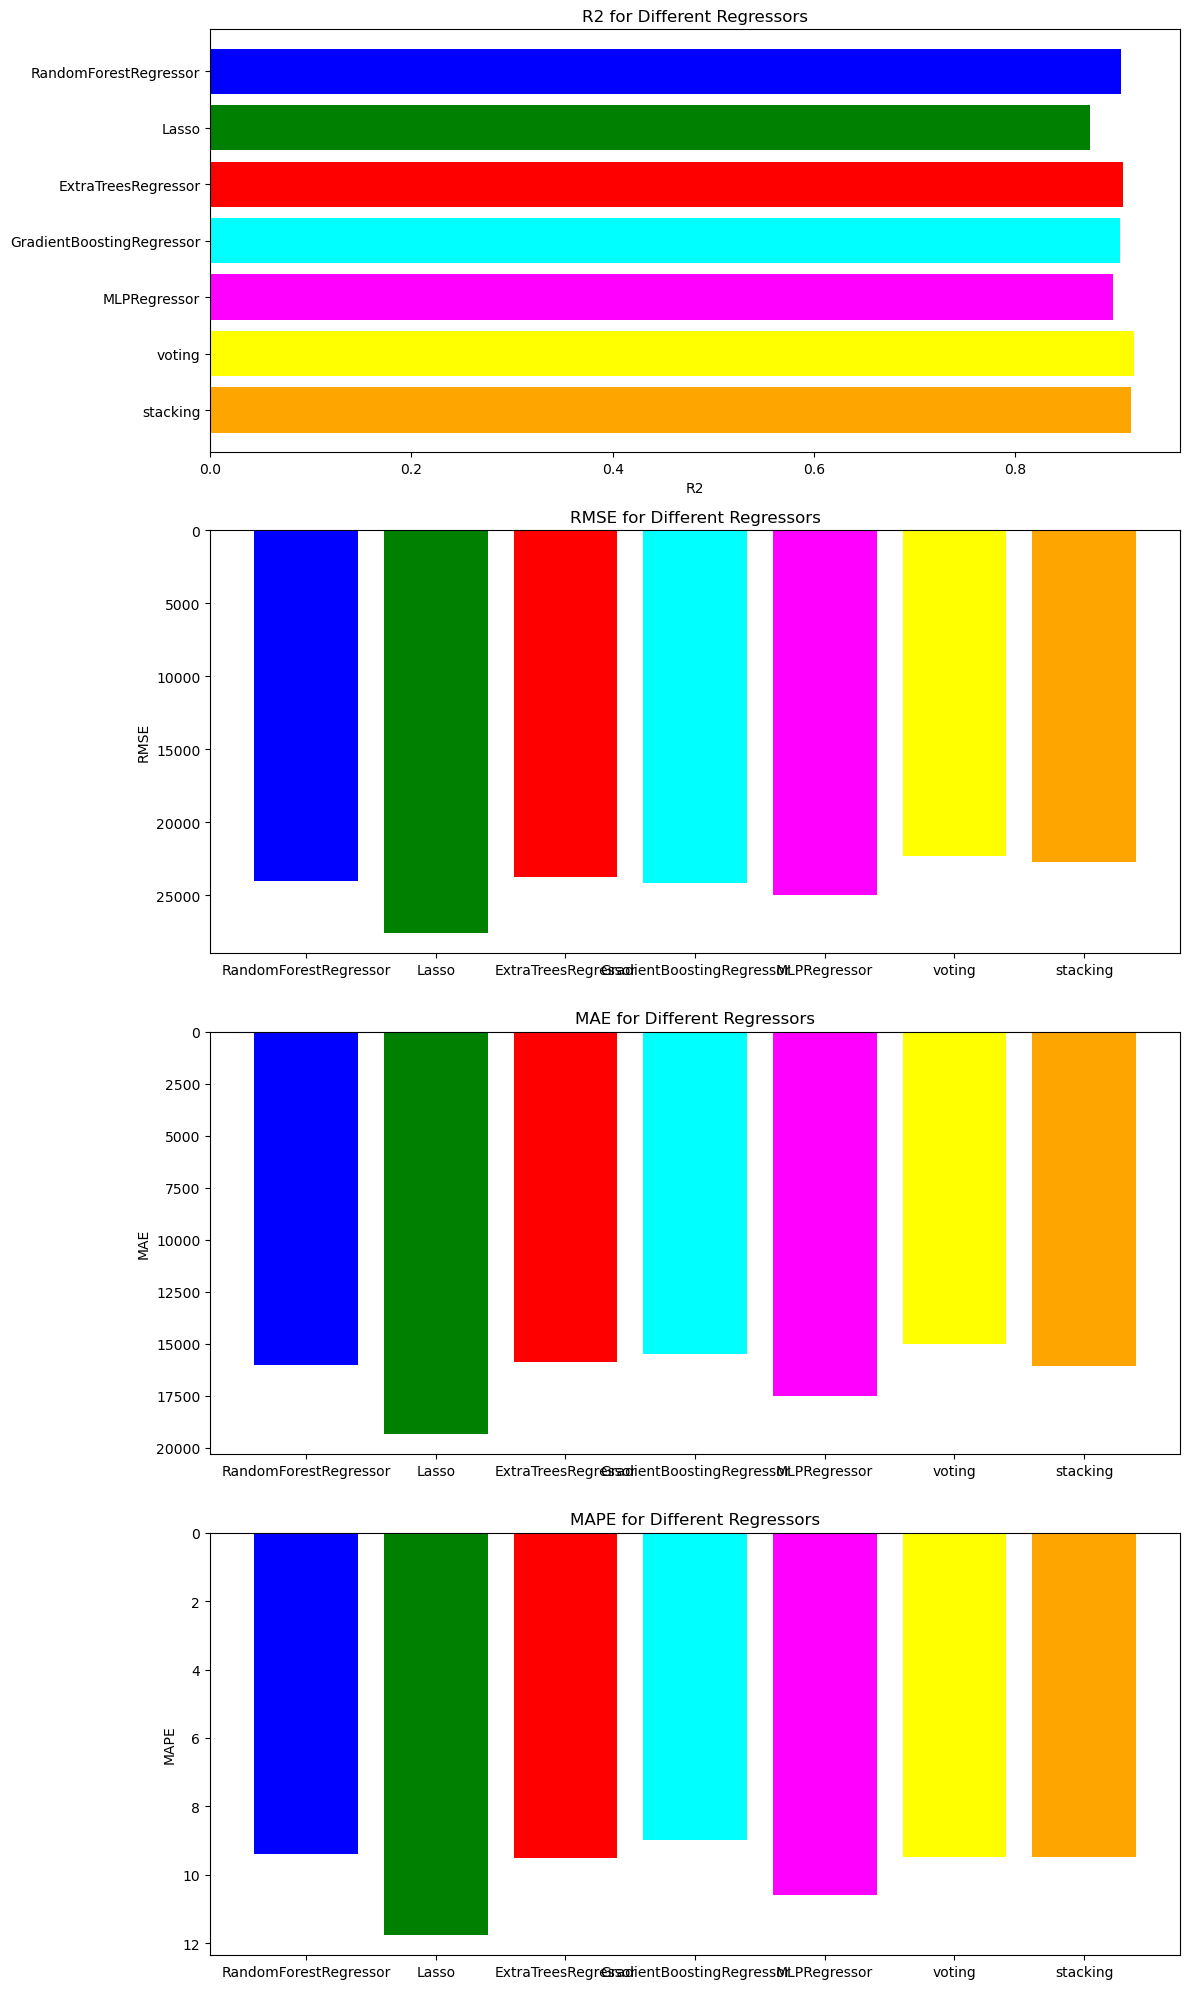

In [133]:
import matplotlib.pyplot as plt

# Extract metrics
#results={}
results['RandomForestRegressor'] = {'R2':0.904731, 'RMSE':24050.255338, 'MAE':16010.591446,'MAPE':9.405613}
results['Lasso'] = {'R2':0.874631, 'RMSE':27589.211239, 'MAE':19347.503005, 'MAPE':11.763666}
results['ExtraTreesRegressor'] = {'R2':0.907056, 'RMSE':23754.903760, 'MAE':15888.753593,'MAPE':9.509303}
results['GradientBoostingRegressor'] = {'R2':0.903522, 'RMSE':24202.394444, 'MAE':15503.781445,'MAPE':8.971379}
results['MLPRegressor'] = {'R2':0.897008, 'RMSE':25006.122508, 'MAE':17521.312655,'MAPE':10.602610}
results['voting']={'R2':0.917742,'RMSE':22347.686119,'MAE':15028.252020,'MAPE':9.487668}
results['stacking']={'R2':0.914771,'RMSE':22747.659003,'MAE':16066.184995,'MAPE':9.487668}

metrics = list(results['RandomForestRegressor'].keys())

# Adjusting the visualization based on the feedback
fig, axs = plt.subplots(nrows=len(metrics), figsize=(12, 20))

for idx, metric in enumerate(metrics):
    values = [model[metric] for model in results.values()]
    
    # For R2, we use a horizontal bar plot
    if metric == 'R2':
        axs[idx].barh(list(results.keys()), values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange'])
        axs[idx].set_title(f'{metric} for Different Regressors')
        axs[idx].set_xlabel(metric)
        axs[idx].invert_yaxis()
    
    # For RMSE, MAE, and MAPE, we use vertical bar plots with inverted y-axis to depict lower values as better
    else:
        axs[idx].bar(list(results.keys()), values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange'])
        axs[idx].set_title(f'{metric} for Different Regressors')
        axs[idx].set_ylabel(metric)
        axs[idx].invert_yaxis()  # Invert y-axis to show lower values at the top

plt.tight_layout()
plt.show()
